# Twitter Sentiment Analysis for Brand Perception

## Business Problem  
In today's digital age, understanding public sentiment and attitudes towards specific topics or brands in social media is crucial for businesses and organizations. Social media platforms serve as a vast repository of unstructured text data, and unlocking the insights hidden within this data can provide a competitive advantage. The business problem at hand is to harness the power of Natural Language Processing (NLP) and data analytics to gain a comprehensive understanding of public sentiment and attitudes on social media platforms.

#### Objectives:

* Analyze sentiment patterns: Utilize NLP techniques to perform sentiment analysis on social media text data.
* Visualize sentiment trends: Create informative data visualizations to represent sentiment trends over time.
* Extract insights from the data:Dive deep into the sentiment analysis results to extract valuable insights


## Data Understanding 
The data is obtained from Kaggle:[Twitter Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet




In [43]:
# create column names
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
# load the data
df = pd.read_csv('twitter_training.csv', names=col_names)
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [44]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The columns are:      
``ID``: Unique identifier for each entry  
``Entity``: Entity or brand mentioned in social media content  
``Sentiment``: Sentiment labels (e.g., Positive, Negative, Neutral)  
``Content``: Text content of social media posts

In [45]:
# Check Data Dimensions
df.shape

(74682, 4)

The dataset consists of 74682 rows and 4 columns.

In [53]:
df.dtypes

ID            int64
Entity       object
Sentiment    object
Content      object
dtype: object

## Data Preparation

In [47]:
# check for missing values
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

##### Dealing with the missing values

In [48]:
# dropping the rows with content missing values
df.dropna(subset = ['Content'],inplace=True)

In [49]:
# Count the total number of duplicate rows
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 2340


Drop the duplicated rows

In [50]:
# Drop duplicate rows
df.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

replace irrelevant to neutral

In [51]:
# replace irrelevant to neutral
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

## Exploratory Data Analysis

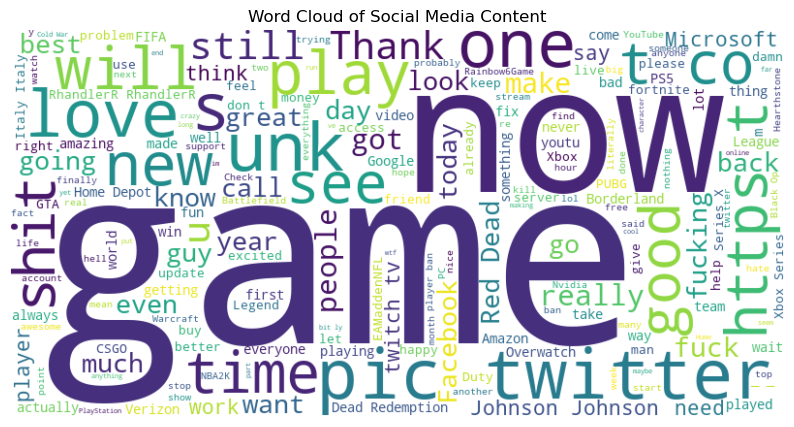

In [54]:
# Text Data Analysis 
text_data = ' '.join(df['Content'].dropna())  # Combine text from all rows (excluding missing values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Social Media Content")
plt.show()

Sentiment Distribution Analysis

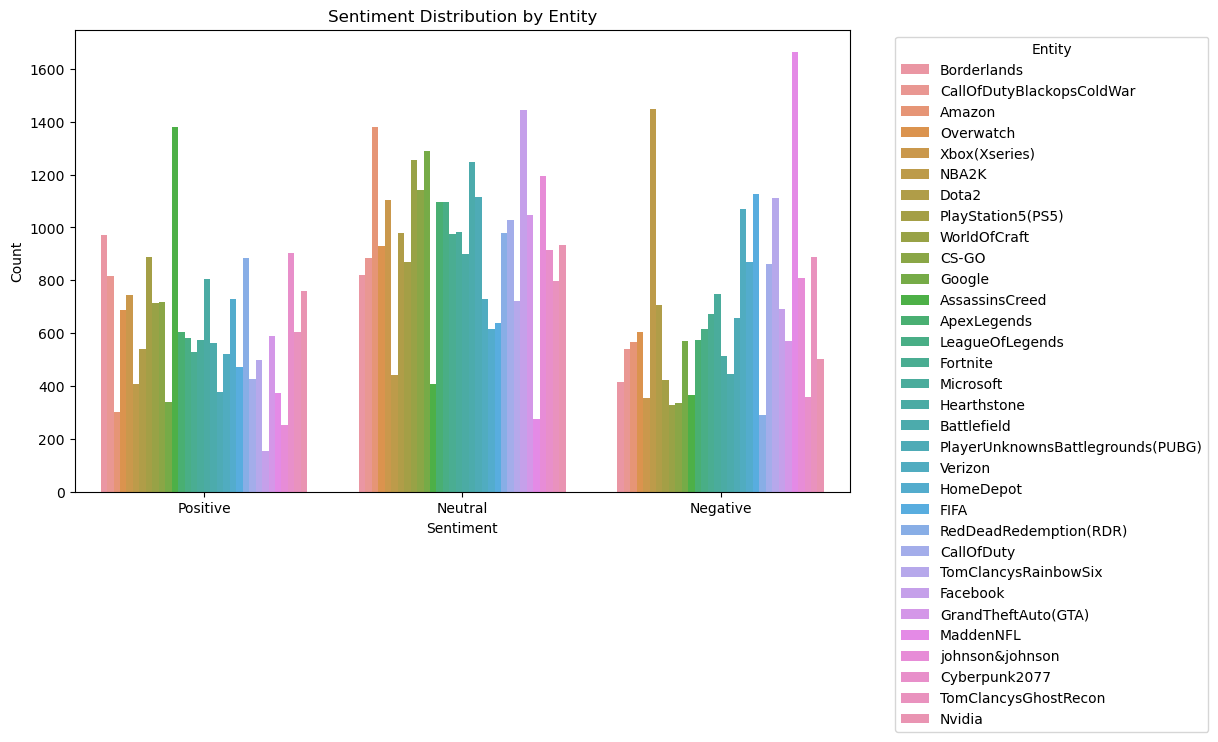

In [56]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Text Length Analysis

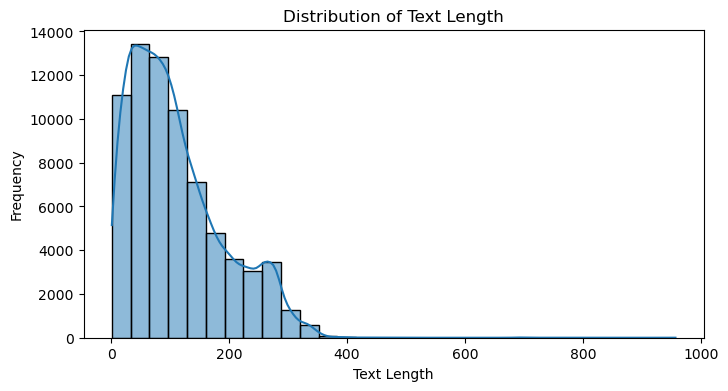

In [57]:
# Example for text length analysis
df['Text_Length'] = df['Content'].str.len()  # Calculate text length
plt.figure(figsize=(8, 4))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


Word Frequency Analysis

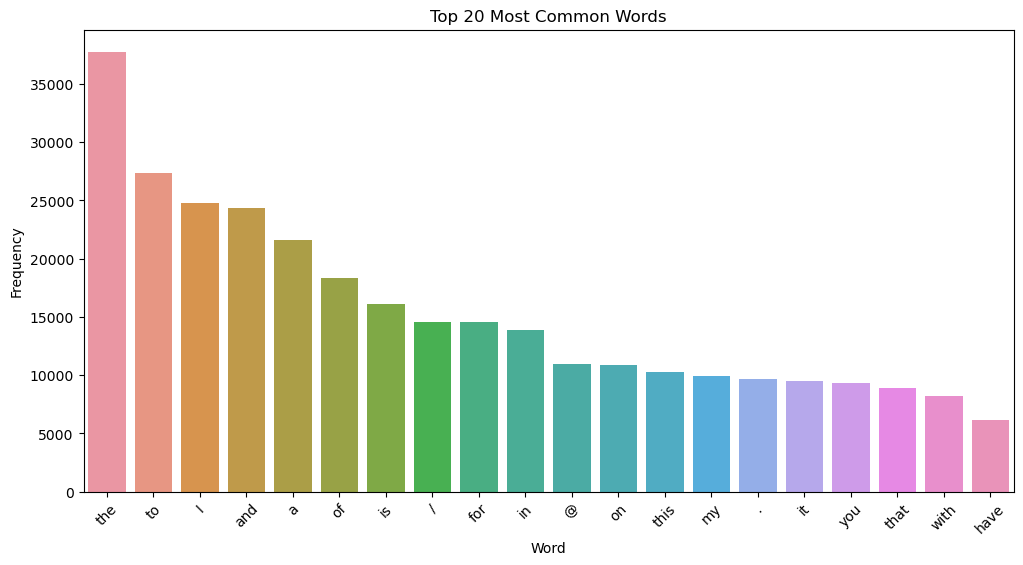

In [58]:
# Example for word frequency analysis
from collections import Counter

words = ' '.join(df['Content']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Plot the top N most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


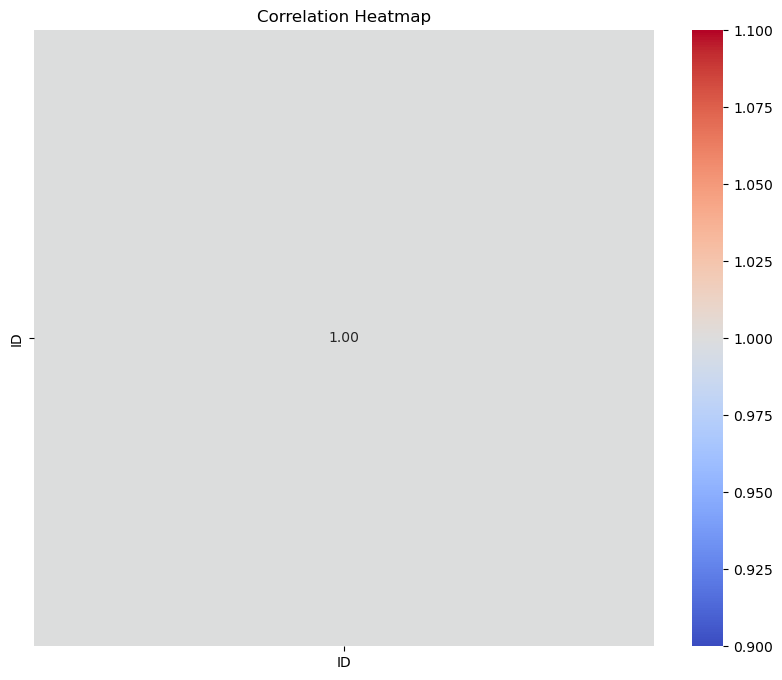

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()